In [2]:
import pandas as pd
import requests

In [3]:
url = 'https://api.data.abs.gov.au/data/ABS,WPI,1.0.0/1.THRPEB.7.TOT.10.AUS.Q?startPeriod=1997-Q3&endPeriod=2022-Q1&detail=dataonly&format=jsondata'

In [4]:
requests.get(url)

<Response [200]>

In [5]:
response_data = requests.get(url)

In [6]:
response_content = response_data.content

In [16]:
import json
data = response_data.json()

In [17]:
print(json.dumps(data, indent=4))

{
    "meta": {
        "schema": "https://raw.githubusercontent.com/sdmx-twg/sdmx-json/master/data-message/tools/schemas/1.0/sdmx-json-data-schema.json",
        "id": "IREF021332",
        "prepared": "2022-08-08T15:27:56Z",
        "test": false,
        "contentLanguages": [
            "en"
        ],
        "sender": {
            "id": "_Stat_V8",
            "name": "unknown",
            "names": {
                "en": "unknown"
            }
        }
    },
    "data": {
        "dataSets": [
            {
                "action": "Information",
                "links": [
                    {
                        "urn": "urn:sdmx:org.sdmx.infomodel.datastructure.DataStructure=ABS:WPI(1.0.0)",
                        "rel": "DataStructure"
                    }
                ],
                "annotations": [
                    0,
                    1,
                    2,
                    3,
                    4,
                    5
                ],
   

In [19]:
data_1 = pd.DataFrame(data)

In [18]:
data_1["data"][6]

[{'action': 'Information',
  'links': [{'urn': 'urn:sdmx:org.sdmx.infomodel.datastructure.DataStructure=ABS:WPI(1.0.0)',
    'rel': 'DataStructure'}],
  'annotations': [0, 1, 2, 3, 4, 5],
  'series': {'0:0:0:0:0:0:0': {'attributes': [None, None],
    'annotations': [],
    'observations': {'0': [66.7],
     '1': [67.3],
     '2': [67.8],
     '3': [68.2],
     '4': [68.9],
     '5': [69.3],
     '6': [70],
     '7': [70.3],
     '8': [71],
     '9': [71.4],
     '10': [71.9],
     '11': [72.3],
     '12': [73.2],
     '13': [73.8],
     '14': [74.6],
     '15': [75],
     '16': [75.8],
     '17': [76.4],
     '18': [76.9],
     '19': [77.4],
     '20': [78.3],
     '21': [78.9],
     '22': [79.7],
     '23': [80.1],
     '24': [81.1],
     '25': [81.9],
     '26': [82.5],
     '27': [82.9],
     '28': [84],
     '29': [84.8],
     '30': [85.7],
     '31': [86.3],
     '32': [87.5],
     '33': [88.3],
     '34': [89.2],
     '35': [89.9],
     '36': [90.9],
     '37': [91.8],
     '38':

In [11]:
pd.DataFrame(data_1["data"])

,data
schema,NaN
id,NaN
prepared,NaN
test,NaN
contentLanguages,NaN
sender,NaN
dataSets,"[{'action': 'Information', 'links': [{'urn': '..."
structure,"{'name': 'Wage Price Index', 'names': {'en': '..."


In [12]:
data_3 = data_1["data"]['structure']
data_4 = data_3['dimensions']['observation'][0]['values']
data_4
wpi_name = []

for i in data_4:
    ls = i['id']
    wpi_name.append(ls)
    

In [13]:
data_2 = data_1["data"]['dataSets']
data_final = data_2[0]['series']['0:0:0:0:0:0:0']['observations']
data_final

{'0': [66.7],
 '1': [67.3],
 '2': [67.8],
 '3': [68.2],
 '4': [68.9],
 '5': [69.3],
 '6': [70],
 '7': [70.3],
 '8': [71],
 '9': [71.4],
 '10': [71.9],
 '11': [72.3],
 '12': [73.2],
 '13': [73.8],
 '14': [74.6],
 '15': [75],
 '16': [75.8],
 '17': [76.4],
 '18': [76.9],
 '19': [77.4],
 '20': [78.3],
 '21': [78.9],
 '22': [79.7],
 '23': [80.1],
 '24': [81.1],
 '25': [81.9],
 '26': [82.5],
 '27': [82.9],
 '28': [84],
 '29': [84.8],
 '30': [85.7],
 '31': [86.3],
 '32': [87.5],
 '33': [88.3],
 '34': [89.2],
 '35': [89.9],
 '36': [90.9],
 '37': [91.8],
 '38': [92.8],
 '39': [93.5],
 '40': [94.8],
 '41': [95.7],
 '42': [96.6],
 '43': [97.5],
 '44': [98.6],
 '45': [99.8],
 '46': [100.5],
 '47': [101.1],
 '48': [102],
 '49': [102.7],
 '50': [103.6],
 '51': [104.2],
 '52': [105.7],
 '53': [106.6],
 '54': [107.6],
 '55': [108.2],
 '56': [109.5],
 '57': [110.5],
 '58': [111.4],
 '59': [112.2],
 '60': [113.5],
 '61': [114.3],
 '62': [115],
 '63': [115.5],
 '64': [116.6],
 '65': [117.2],
 '66': [118]

In [20]:
df1 = pd.DataFrame(data_final).T
df1.columns = ['WPI']

df1['Time'] = wpi_name
df1 = df1.set_index(['Time'])

<AxesSubplot:xlabel='Time'>

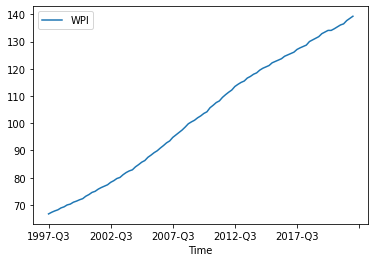

In [15]:
df_plot = df1.plot(kind = 'line')
df_plot